# XGBoost Algorithm
---
##### Created by Carlos Moreno, Elizabeth Khan, Frances Leung, Jeffrey Laughman 
_Last Updated on 7/14/2022_


We are importing the same libraries as the original notebook and including XGBboost

In [1]:
# !pip install xgboost

In [2]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# XGBoost
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, decomposition, datasets
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import PrecisionRecallDisplay

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import os
import matplotlib.pyplot as plt
import math
import random

# my script
from w210_model_library import print_confusion_matrix
from w210_model_library import modelresults, modelresults_2, crossvalidation,assignRisk 
from w210_model_library import newPred, riskdistribution, fattrtype, importance_attr

# random.seed(1234)
#dirname = '../model/'
dirname = '../modeldata/'
dirpm = '../prediction_train_test/'

cols1 = ['Key','train_test','lon_t_x', 'lat_t', 'Group_x','label','Prediction','No_SH', 'SH', 'Num', 'name_x', 'DateD',
        'imgnum','Sinkhole', 'ID',  'geometry', 'AnnualCrop', 'Forest',
        'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential',
        'River', 'SeaLake', 'prediction', 'prediction_name', 'l25', 'l50', 'l75', 'l100', 'l150', 'l200', 
        'l250', 'l300', 'l500', 'l750', 'l1000', 'l1000plus', 'coloc', 'Y25', 'Y50', 'Y75', 'Y100', 'Y150',
        'Y200', 'Y250', 'Y300', 'Y500', 'Y750', 'Y1000', 'Y1000plus', 'Ycoloc', 'Key_ws', 'ws_name',
        'lon_w', 'lat_w', 'County', 'Calcium Carbonate', 'Gypsum', 'Soil Health Organic Matter',
        'Percent Clay', 'Percent Sand', 'Percent Silt', 'Available Water Storage', 'rolling_7_precip',
        'rolling_15_precip', 'rolling_30_precip', 'rolling_60_precip', 'rolling_90_precip', 'y1_mean_prc',
        'y1_max_prc', 'y1_mean_tmp', 'y1_max_tmp', 'y1_min_tmp', 'y2_mean_prc', 'y2_max_prc', 'y2_mean_tmp',
        'y2_max_tmp', 'y2_min_tmp', 'y3_mean_prc', 'y3_max_prc', 'y3_mean_tmp', 'y3_max_tmp', 'y3_min_tmp',
        'gridcode']

### 1. Read in file

In [3]:
finEvents = pd.read_csv(dirname+"data_model1_365.csv")

# finEvents = pd.read_csv(dirgroups+"data365_sh_county_gr.csv")


finEvents.isnull().values.any(), finEvents.isnull().sum().sum()

(False, 0)

In [4]:
finEvents = finEvents.dropna()
finEvents.isnull().values.any(), finEvents.isnull().sum().sum()

(False, 0)

### 2. Select Features

We do not have to scale features are we are using XGBoost which does not require features to be scaled prior to running the algorithm.


In [5]:
# shvars = ['l25', 'l50', 'l75', 'l100', 'l150','l200', 'l250', 'l300', 'l500', 'l750', 'l1000',
#           'Y25', 'Y50', 'Y75', 'Y100', 'Y150', 'Y200', 'Y250', 'Y300', 'Y500','Y750', 'Y1000']

# satvars = ['AnnualCrop', 'Forest','HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 
#            'PermanentCrop', 'Residential', 'River', 'SeaLake']

# wsvars = ['y1_mean_prc', 'y1_max_prc', 'y1_mean_tmp', 'y1_max_tmp', 'y1_min_tmp',
#           'y2_mean_prc', 'y2_max_prc', 'y2_mean_tmp', 'y2_max_tmp', 'y2_min_tmp', 
#           'y3_mean_prc', 'y3_max_prc', 'y3_mean_tmp', 'y3_max_tmp', 'y3_min_tmp']

# wsvars2 = ['y1_mean_prc', 'y1_max_prc', 'y1_max_tmp', 'y1_min_tmp',
#           'y2_mean_prc', 'y2_max_prc', 'y2_max_tmp', 'y2_min_tmp', 
#           'y3_mean_prc', 'y3_max_prc', 'y3_max_tmp', 'y3_min_tmp']

# wsrolling = ['rolling_7_precip', 'rolling_15_precip', 'rolling_30_precip',
#              'rolling_60_precip', 'rolling_90_precip']

# wsvars3 = ['y1_mean_prc', 'y1_max_prc', 'y1_mean_tmp', 'y1_max_tmp', 'y1_min_tmp']

# karst1 = ['gridcode']

# soilattr = ['Calcium Carbonate', 'Soil Health Organic Matter', 'Percent Clay', 
#             'Gypsum',
#             'Percent Sand','Percent Silt', 'Available Water Storage']

# x_variables = shvars  + satvars + wsrolling + karst1 + soilattr + wsvars

# # x_variables = shvars  + wsvars2 + karst1 + soilattr

# attrdict = {"Sinkhole": shvars, "Satellite": satvars, "Weather Rolling": wsrolling,
#             "Karst": karst1, "Soil": soilattr, "Weather Yearly": wsvars}

# print(x_variables)
# print(len(x_variables))


In [6]:
# dfvars = pd.read_csv(dirname+"attr60.csv")
# dfvars = pd.read_csv(dirname+"attr70.csv")
dfvars = pd.read_csv(dirname+"attr80.csv")
# dfvars = pd.read_csv(dirname+"attr90.csv")
# dfvars = pd.read_csv(dirname+"attr95.csv")
# dfvars = pd.read_csv(dirname+"attr100.csv")

# x_variables = ['Available Water Storage',
#  'Calcium Carbonate',
#  'Forest',
# #  'Group',
#  'Percent Clay',
#  'Percent Sand',
#  'SeaLake',
#  'Soil Health Organic Matter',
#  'gridcode',
#  'l1000plus',
#  'l25',
# #  'lon_t',
#  'rolling_7_precip',
#  'y1_max_prc',
#  'y1_max_tmp',
#  'y2_max_prc',
#  'y2_max_tmp',
#  'y3_max_prc',
#  'y3_max_tmp']


x_variables = list(dfvars["attribute"].unique())
len(x_variables)

34

In [7]:
features = finEvents[x_variables]

# features = gr1[x_variables]

# One-hot encode the data using pandas get_dummies
# features = pd.get_dummies(features)

In [8]:
np.random.seed(42)

X = np.array(features)
Y = np.array(finEvents["Sinkhole"])
Group = np.array(finEvents["Group"])
Keys = np.array(finEvents["Key"])
Lon_t = np.array(finEvents["lon_t"])
Lat_t = np.array(finEvents["lat_t_x"])

shuffle = np.random.permutation(np.arange(X.shape[0]))

X, Y, Group = X[shuffle], Y[shuffle], Group[shuffle]
Keys, Lon_t, Lat_t = Keys[shuffle], Lon_t[shuffle], Lat_t[shuffle]


# Define sizes for train, development and test data (0.8, 0.0, 0.2)
train = 0.80
val = 0
test = 1- train

num_images = len(Y)
train_size = int(round(num_images * train,0))
val_size = int(round(num_images * val,0))
test_size = num_images - train_size - val_size

print(train_size, val_size, test_size)

test_data, test_labels, test_group = X[train_size+val_size:], Y[train_size+val_size:], Group[train_size+val_size:]
test_keys, test_lont_t, test_lat_t = Keys[train_size+val_size:],  Lon_t[train_size+val_size:], Lat_t[train_size+val_size:]

# val_data, val_labels = X[train_size:train_size+val_size], Y[train_size:train_size+val_size]
train_data, train_labels, train_group = X[:train_size], Y[:train_size], Group[:train_size]
train_keys, train_lon_t, train_lat_t = Keys[:train_size],  Lon_t[:train_size], Lat_t[:train_size]

dftrain = pd.DataFrame({"Key": train_keys, "lon_t": train_lon_t, "lat_t": train_lat_t, "Group": train_group})
dftest = pd.DataFrame({"Key": test_keys, "lon_t": test_lont_t, "lat_t":test_lat_t, "Group": test_group })

print(len(test_data), len(train_data), len(train_group))

np.count_nonzero(Y == 0), np.count_nonzero(Y == 1)

178 0 44
44 178 178


(110, 112)

### 3. Hyperparameter Tuning
This section is where the cross validation happens for XGBoost to determine the optimal number for hyperparameters. We will find out the best parameters to include in the final XGBoost model. By default, we are using 5 folds.

In [9]:
def tune_xgboost(train_data, train_labels, folds=5):
    # parameters to iterate through using grid search cv
    params = {
        'max_depth': range (6, 20, 2),
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        #'lambda': [.25, .2, .1 ,.001],
        'eta':[.001, .1, .2, .3], #equivalent to learning rate; also can help with overfitting
        'subsample': [.25], #helps with overfitting
        'gamma': [0.1, 0.2],
        'alpha': [0.1, 0.2]}

    # list of names of parameters for looping purposes
    param_names = ['max_depth', 'learning_rate','gamma', 'alpha']
    
    #intialize xgboost model
    xgb_2 = xgb.XGBClassifier(objective= 'binary:logistic',seed=18)

    # initalize gridsearch cv to search identify optimal parameters of predefined XGBoost algorithm designated number of folds
    clf = GridSearchCV(estimator=xgb_2, param_grid = params, scoring='roc_auc', n_jobs = -1, cv = folds,verbose=True)
    # fit XGBoost model to parameters specified above
    clf.fit(train_data,train_labels)
    best_params = clf.best_params_
    print(best_params)

    return clf, best_params

In [10]:
clf, best_params = tune_xgboost(train_data, train_labels)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
{'alpha': 0.2, 'eta': 0.001, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 6, 'subsample': 0.25}


In [11]:
best_params

{'alpha': 0.2,
 'eta': 0.001,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 6,
 'subsample': 0.25}

### 4. Train XGBoost model
We are taking the best parameters from the previous section and then using them in the best xgboost model. We include `early stopping` here to prevent overfitting.

In [12]:
def best_xgb_model(train_data, train_labels, best_params):
    # intialize xgboost using best parameters identified from previous step
    xgb1 = xgb.XGBClassifier(objective= 'binary:logistic', 
#                              eval_metric='logloss',
                             max_depth = best_params['max_depth'],
                             learning_rate = best_params['learning_rate'],
                             gamma = best_params['gamma'],
                             alpha = best_params['alpha'],
                             eta = best_params['eta'],
                             subsample = best_params['subsample'],
                             nthread=4,seed=42)
    eval_set = [(test_data, test_labels)]
    # fit model
    xgb1.fit(train_data, train_labels, early_stopping_rounds=4, eval_metric="logloss", eval_set=eval_set, verbose=True)

    return xgb1

In [13]:
xgb1 = best_xgb_model(train_data, train_labels, best_params)

[0]	validation_0-logloss:0.69160
[1]	validation_0-logloss:0.68981
[2]	validation_0-logloss:0.68953
[3]	validation_0-logloss:0.68714
[4]	validation_0-logloss:0.68633
[5]	validation_0-logloss:0.68468
[6]	validation_0-logloss:0.68320
[7]	validation_0-logloss:0.68147
[8]	validation_0-logloss:0.68017
[9]	validation_0-logloss:0.67935
[10]	validation_0-logloss:0.67859
[11]	validation_0-logloss:0.67566
[12]	validation_0-logloss:0.67410
[13]	validation_0-logloss:0.67233
[14]	validation_0-logloss:0.67043
[15]	validation_0-logloss:0.66876
[16]	validation_0-logloss:0.66714
[17]	validation_0-logloss:0.66596
[18]	validation_0-logloss:0.66478
[19]	validation_0-logloss:0.66448
[20]	validation_0-logloss:0.66381
[21]	validation_0-logloss:0.66104
[22]	validation_0-logloss:0.65968
[23]	validation_0-logloss:0.65794
[24]	validation_0-logloss:0.65564
[25]	validation_0-logloss:0.65327
[26]	validation_0-logloss:0.65154
[27]	validation_0-logloss:0.65089
[28]	validation_0-logloss:0.65003
[29]	validation_0-loglos

/Users/carlosmoreno/opt/anaconda3/envs/w210/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/carlosmoreno/opt/anaconda3/envs/w210/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


### 5. Evaluate XGBoost Model

We use the confusion matrix and evaluation metrics accuracy, precision, recall, and F1 Score to evaluate the model.

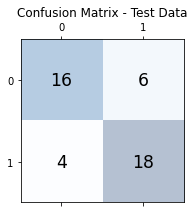

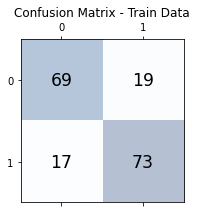

In [14]:
predictions = xgb1.predict(test_data)

print_confusion_matrix(test_labels, predictions, "Confusion Matrix - Test Data")
print_confusion_matrix(train_labels, xgb1.predict(train_data), "Confusion Matrix - Train Data")

In [15]:
def get_metrics(train_data,train_labels, test_data, test_labels, model):
    dfResults = pd.DataFrame()
    dfPred = {}
    
    scenarios = ["Train", "Test"]
    accuracy1 = []
    precision = []
    recall = []
    f1_score_list = []
    f1_scr_weighted = []
    
    for scenario in scenarios:
        
        data = []
        labels = []
        
        if scenario == "Train":
            data = train_data
            labels = train_labels
        else:
            data = test_data
            labels = test_labels
        
        predictions = model.predict(data)
        
        accuracy1.append(accuracy_score(labels, predictions)) 
        precision.append(precision_score(labels, predictions))
        recall.append(recall_score(labels, predictions))
        f1_score_list.append(f1_score(labels, predictions))
        f1_scr_weighted.append(metrics.f1_score(labels, predictions, average="weighted"))
        dfPred[scenario] = predictions

    index = ["Accuracy", "Precision", "Recall", "F1_score", "F1_score_weighted"]
    
    results = [accuracy1, precision, recall, f1_score_list, f1_scr_weighted]
    results = [accuracy1, precision, recall, f1_score_list, f1_scr_weighted]
    dfResults = pd.DataFrame(results, columns=scenarios, index=index)


    return(dfResults, dfPred)

In [16]:
dfResults, dfPred = get_metrics(train_data,train_labels, test_data, test_labels, xgb1)

In [17]:
dfResults

,Train,Test
Accuracy,0.797753,0.772727
Precision,0.793478,0.750000
Recall,0.811111,0.818182
F1_score,0.802198,0.782609
F1_score_weighted,0.797702,0.772257


In [18]:
def joinpredict(model, data, labels, df, dfr, cols1, traintest):
    
    pred_prob = model.predict_proba(data)
    df["label"] = labels
    df["train_test"] = traintest
    df["Prediction"] = model.predict(data)
    df["No_SH"] = pred_prob[:,0]
    df["SH"] = pred_prob[:,1]
    df["Num"] = 1
    
    df = pd.merge(df, dfr, how="left", on="Key" )
    df = df[cols1]
    df = df.rename(columns= {'lon_t_x': "lon_t"})
    
    return df

In [19]:
dftrain1 = joinpredict(xgb1, train_data, train_labels, dftrain, finEvents, cols1, "train")
dftest1 = joinpredict(xgb1, test_data, test_labels, dftest, finEvents, cols1, "test")
dffin = pd.concat([dftrain1, dftest1])
print(len(dffin))
dffin.head()

222


,Key,train_test,lon_t,lat_t,Group_x,label,Prediction,No_SH,SH,Num,...,y2_max_prc,y2_mean_tmp,y2_max_tmp,y2_min_tmp,y3_mean_prc,y3_max_prc,y3_mean_tmp,y3_max_tmp,y3_min_tmp,gridcode
0,2010_0_1,train,-80.629636,27.377177,1,0,0,0.545949,0.454051,1,...,0.00,72.064110,83.8,47.6,0.000000,0.00,68.205753,83.3,42.6,2
1,2459_0_2,train,-81.521305,28.504864,2,0,1,0.481263,0.518737,1,...,4.10,74.223836,87.7,47.2,0.150000,7.48,73.503288,85.5,41.1,2
2,2334_1_0,train,-82.159477,29.209624,0,1,1,0.387674,0.612326,1,...,2.66,69.867671,83.6,34.7,0.000741,0.09,71.441918,85.6,38.6,2
3,3003_0_2,train,-81.285103,28.732048,2,0,1,0.470918,0.529082,1,...,2.30,73.426301,86.2,45.7,0.125507,1.91,72.278630,85.6,39.2,1
4,2334_0_1,train,-84.908569,30.482215,1,0,0,0.574610,0.425390,1,...,5.66,68.090137,85.8,31.3,0.126822,7.63,70.206301,91.7,33.9,1


In [62]:
test1 = dffin[(dffin["train_test"]=="test") & (dffin["label"]==1)]

In [67]:
favorable = test1[test1["SH"]>=0.45]

In [68]:
len(favorable)/len(test1)

0.8181818181818182

In [20]:
# dffin.to_csv("../prediction_train_test/xgb_traintest_pred.csv")

### 6. Generate Predictions for Scale Up data

In [21]:
SU_data = pd.read_csv(dirname+"scale_up_F_satellite_ws_soil_karst_sh_attr.csv")
SU_features = SU_data[x_variables]
SU_test = np.array(SU_features)
SU_test.shape

(407463, 34)

In [38]:
SU_data.columns

Index(['Unnamed: 0', 'Key', 'Calcium Carbonate', 'Gypsum',
       'Soil Health Organic Matter', 'Percent Clay', 'Percent Sand',
       'Percent Silt', 'Available Water Storage', 'date_ws', 'name_x', 'lon_t',
       'lat_t', 'rolling_7_precip', 'rolling_15_precip', 'rolling_30_precip',
       'rolling_60_precip', 'rolling_90_precip', 'y1_mean_prc', 'y1_max_prc',
       'y1_mean_tmp', 'y1_max_tmp', 'y1_min_tmp', 'y2_mean_prc', 'y2_max_prc',
       'y2_mean_tmp', 'y2_max_tmp', 'y2_min_tmp', 'y3_mean_prc', 'y3_max_prc',
       'y3_mean_tmp', 'y3_max_tmp', 'y3_min_tmp', 'County', 'county_fp',
       'name_y', 'imagenum', 'geometry', 'AnnualCrop', 'Forest',
       'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture',
       'PermanentCrop', 'Residential', 'River', 'SeaLake', 'prediction',
       'prediction_name', 'gridcode', 'DateD', 'l25', 'l50', 'l75', 'l100',
       'l150', 'l200', 'l250', 'l300', 'l500', 'l750', 'l1000', 'l1000plus',
       'coloc', 'Y25', 'Y50', 'Y75', 'Y100', 'Y

In [56]:
tn = "057_151895"
print(SU_data[SU_data["Key"] == tn]['Percent Silt'])
print(SU_data[SU_data["Key"] == tn]['Percent Clay'])
print(SU_data[SU_data["Key"] == tn]['prediction_name'])
print(SU_data[SU_data["Key"] == tn]['Available Water Storage'])
print(SU_data[SU_data["Key"] == tn]["y2_mean_prc"])
print(SU_data[SU_data["Key"] == tn]["l200"])
print(SU_data[SU_data["Key"] == tn]['Y250'])

143588    3.8184
Name: Percent Silt, dtype: float64
143588    6.3676
Name: Percent Clay, dtype: float64
143588    Forest
Name: prediction_name, dtype: object
143588    14.55057
Name: Available Water Storage, dtype: float64
143588    0.0
Name: y2_mean_prc, dtype: float64
143588    21
Name: l200, dtype: int64
143588    1157
Name: Y250, dtype: int64


In [57]:
tn = "001_62304"
print(SU_data[SU_data["Key"] == tn]['Percent Silt'])
print(SU_data[SU_data["Key"] == tn]['Percent Clay'])
print(SU_data[SU_data["Key"] == tn]['prediction_name'])
print(SU_data[SU_data["Key"] == tn]['Available Water Storage'])
print(SU_data[SU_data["Key"] == tn]["y2_mean_prc"])
print(SU_data[SU_data["Key"] == tn]["l200"])
print(SU_data[SU_data["Key"] == tn]['Y250'])

56551    6.1984
Name: Percent Silt, dtype: float64
56551    10.8935
Name: Percent Clay, dtype: float64
56551    Industrial
Name: prediction_name, dtype: object
56551    19.42943
Name: Available Water Storage, dtype: float64
56551    0.147068
Name: y2_mean_prc, dtype: float64
56551    0
Name: l200, dtype: int64
56551    0
Name: Y250, dtype: int64


In [22]:
# Function to Create DataFrame with High, Medium, Low Risk Distribution for a given data
def predprob(data, pipeline, SU_data):
    
    pred_prob = pipeline.predict_proba(data)
    dfprob = pd.DataFrame()
    dfprob["Key"] = SU_data["Key"]
    dfprob["lon_t"] = SU_data["lon_t"]
    dfprob["lat_t"] = SU_data["lat_t"]
    dfprob["No_SH"] = pred_prob[:,0]
    dfprob["SH"] = pred_prob[:,1]
    dfprob["Prediction"] = pipeline.predict(data)
    dfprob["Num"] = 1
    
    return (dfprob)

In [23]:
xgb_prob = predprob(SU_test, xgb1, SU_data)

In [24]:
# xgb_prob.to_csv("../predictions/xgb80_prediction.csv", index=False)

In [25]:
xgb_prob.shape

(407463, 7)

In [26]:
xgb_prob["Prediction"].value_counts()

0    373203
1     34260
Name: Prediction, dtype: int64

In [27]:
xgbg = xgb_prob.groupby('Prediction')[['Num']].sum()
xgbg["Perc_Total"] = xgbg["Num"]/ xgbg["Num"].sum()*100
xgbg

,Num,Perc_Total
Prediction,,
0,373203,91.591875
1,34260,8.408125


In [28]:
xgb_prob.head(1)

,Key,lon_t,lat_t,No_SH,SH,Prediction,Num
0,033_174,-87.624327,30.880381,0.605934,0.394066,0,1


In [29]:
xgbg = xgb_prob.groupby('Prediction')[['Num']].sum()
xgbg["Perc_Total"] = xgbg["Num"]/ xgbg["Num"].sum()*100
xgbg

,Num,Perc_Total
Prediction,,
0,373203,91.591875
1,34260,8.408125


In [31]:
xgb_prob[xgb_prob["Key"] == "001_62304"]

,Key,lon_t,lat_t,No_SH,SH,Prediction,Num
56551,001_62304,-82.075683,29.651921,0.623152,0.376848,0,1


In [ ]:
def createranks(df):
    df["dif_prob"] = df["SH"] - df["No_SH"]
    minp = df["dif_prob"].min()
    df["dp_scale"] = df["dif_prob"] - minp
    
    df["dp_range"] = df["dp_scale"].rank(pct = True)
    bins = np.linspace(df["dp_range"].min(), df["dp_range"].max(),11)
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]
    df['10_bins'] = pd.cut(df['dp_range'], bins=bins, labels=labels, include_lowest=True)
    
    df["Num"] = 1
    
    return df

In [ ]:
def createranks2(df,columnby, nbins, namecolumn):

    df[columnby+"_Rank"] = df[columnby].rank(pct = True)
    bins = np.linspace(df[columnby+"_Rank"].min(), df[columnby+"_Rank"].max(),nbins+1)
    labels = list(range(1, nbins+1))
    df[namecolumn] = pd.cut(df[columnby+"_Rank"], bins=bins, labels=labels, include_lowest=True)
    df["Num"] = 1
    
    return df

In [ ]:
def ranktableSU(df, colrank):
    rank1 = df.pivot_table('Num', index='Num', 
                          columns=colrank,  
                          aggfunc='sum', fill_value=0, 
                          margins=True)
    l = list(rank1.loc['All',:])/rank1.loc['All','All']*100
    rank1.loc[len(rank1.index)] = list(l)
    rank1.rename({rank1.index[-1]: "Prc_Total"}, inplace=True)
    
    return rank1

In [ ]:
def grrank(df, row, color):
    fig = plt.figure(figsize = (10, 5))
    plt.bar(list(df.columns)[0:len(df.columns)-1], 
            list(df.loc[row,:])[0:len(list(df.loc[row,:]))-1], 
            color =color, width = 0.4)

In [ ]:
xgb_prob = createranks(xgb_prob)
xgb_prob.head()

In [ ]:
xgb_prob = createranks2(xgb_prob, "SH", 10, "10_bins2")
xgb_prob.head(1)

In [ ]:
xgb_prob = createranks2(xgb_prob, "SH", 20, "20_bins")
xgb_prob.head(1)

In [ ]:
xgb_prob.groupby("10_bins2")["Num"].sum()

In [ ]:
def scale1(row):
    if row == 10: return(5)
    elif (row >=8) and (row <10): return(4)
    elif row >=6: return(3)
    elif row >=2: return(2)
    else: return(1)

In [ ]:
def scale2(row):
    if row == 10: return(5)
    elif (row >=9): return(4)
    elif row >=8: return(3)
    elif row >=3: return(2)
    else: return(1)

In [ ]:
def scale3(row):
    if row >= 0.55: return(4)
    elif row >= 0.45: return(3)
    elif row >= 0.40: return(2)
    else: return(1)

In [ ]:
def scale4(row):
    if row == 20 : return(5)
    elif row >= 18: return(4)
    elif row >= 16: return(3)
    elif row >= 6: return(2)
    else: return(1)

In [ ]:
xgb_prob["Scale2_1"] = xgb_prob.apply(lambda row: scale2(row["10_bins"]), axis=1)
xgb_prob["Scale2_2"] = xgb_prob.apply(lambda row: scale2(row["10_bins2"]), axis=1)
xgb_prob["Scale3"] = xgb_prob.apply(lambda row: scale3(row["SH"]), axis=1)
xgb_prob.head(2)

In [ ]:
xgb_prob["Scale4"] = xgb_prob.apply(lambda row: scale4(row["20_bins"]), axis=1)

In [ ]:
xgb_prob.head()

In [ ]:
def cutval(df, scale, procol):
    lval = list(df[scale].unique())
    lval.sort()
    print(lval)
    cutlist = []
    for v in lval:
        l4 = xgb_prob[xgb_prob[scale] == v]
        cutlist.append(l4[procol].min())
    return cutlist

In [ ]:
lc = cutval(xgb_prob, "Scale4", "SH")
lc

In [ ]:
s1 = xgb_prob.groupby("Scale3")[["Num"]].sum()
s1

In [ ]:
s1["Num"].sum()

In [ ]:
s2 = xgb_prob.groupby("Scale2_1")[["Num"]].sum()
s2

In [ ]:
xgb_prob.to_csv("../predictions/xgb80_prediction_scales4.csv", index=False)

In [ ]:
xgb_prob["SH"].min(), xgb_prob["SH"].max()